## Классификация при помощи CNN.
На занятии по классификации временных рядов мы разобрали подход, основанный на мере расстояния DTW. Другое семейство алгоритмов основано на вычислении признаков по скользящему окну, например, автоматическая генерация признаков при помощи CNN. В задании вам предлагается разработать baseline решение для классификации рядов из датасета human activity recognition (https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones) при помощи CNN сети. В качестве базовой архитектуры будем использовать наработки с семинара по предсказанию при помощи CNN, где в последнем слое используется softmax в качестве функции активации.

In [34]:
from typing import Tuple

In [35]:
import numpy as np
import pandas as pd
import keras
from tensorflow.keras.utils import to_categorical

### 1. Считаем данные  
- Фичи сразу решейпнем, добавив размерность для свёрточного слоя  
- Лейблы принимают значения от 1 до 6. Для корректного расчёта моделью мы отнимем от ниx 1 (превратим в range(6)) и заэнкодим в категориальный таргет.

In [36]:
def read_data(train_or_test: str) -> Tuple[np.array, np.array]:
    a = []
    with open(f'../data/UCI_HAR_dataset/{train_or_test}/X_{train_or_test}.txt', 'r') as f:
        for line in f:
            a.append([float(i) for i in line.strip().split()])

    X = np.vstack(a)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    y = to_categorical(
        np.loadtxt(f'../data/UCI_HAR_dataset/{train_or_test}/y_{train_or_test}.txt', delimiter=' ') - 1
    )
    
    return X, y

In [37]:
X_train, y_train = read_data('train')
X_test, y_test = read_data('test')

In [38]:
y_test.shape

(2947, 6)

In [39]:
y_train.shape

(7352, 6)

<Axes: >

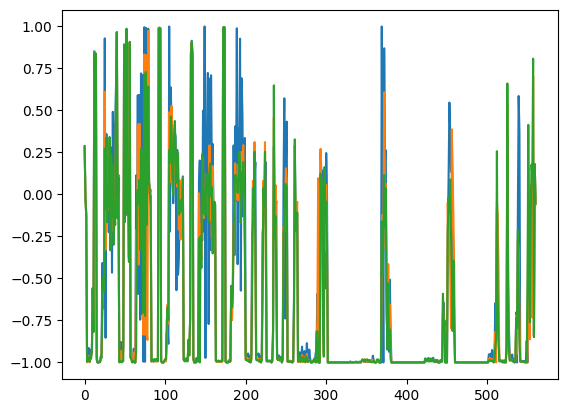

In [40]:
pd.Series(X_train[0].flatten()).plot()
pd.Series(X_train[1].flatten()).plot()
pd.Series(X_train[2].flatten()).plot()

In [41]:
y_train[1], y_train[2], y_train[5000]

(array([0., 0., 0., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0.], dtype=float32))

In [52]:
X_train.shape

(7352, 561, 1)

### 2. Постройте базовую CNN модель.

In [42]:
!pip install tqdm

You should consider upgrading via the '/Users/technogleb/ts_march_2024/.env/bin/python -m pip install --upgrade pip' command.


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.callbacks import Callback
from tqdm.notebook import tqdm

1. Задайте модель Sequential
2. Добавьте входной сверточный слой Conv1D (укажите нужный input_shape)
3. Добавьте слой Flatten, чтобы можно было передать выход со сверточного слоя на вход полносвязному
4. Добавьте полносвязный слой с софтмаксом
5. Соберите модель, в качестве метода оптимизации укажите adam, в качестве функции потерь категориальную кроссэнтропию.
6. Обучите модель
7. Сделайте прогноз и выведите classification_report

In [64]:
# your code here

In [65]:
# your code here

Epoch 1/100
230/230 [==============================] - 1s 4ms/step - loss: 0.3153
Epoch 2/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0969
Epoch 3/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0697
Epoch 4/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0526
Epoch 5/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0510
Epoch 6/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0504
Epoch 7/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0338
Epoch 8/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0293
Epoch 9/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0341
Epoch 10/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0265
Epoch 11/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0248
Epoch 12/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0251
Epoch 13/100


### 3. Попробуйте добавить дополнительный свероточный слой, MaxPooling, и пару промежуточных полносвязный слоев. 

In [26]:
# your code here

In [27]:
# your code here

In [28]:
from sklearn.metrics import classification_report

# your code here

### 4. Попробуйте сравнить качество с базовым dtw, используя fastdtw.

In [73]:
import fastdtw
fastdtw.fastdtw

<function fastdtw._fastdtw.fastdtw>

#### Напишите функцию get_label, возвращающую соответсвующий класс для ряда из X_test
* принимает на вход ряд из X_test
* проходится по всем рядам из X_train
* считает dtw
* возвращает y из y_train, соответвующий минимальному dtw

In [30]:
def get_label(ts_test: np.array) -> np.array:
    # your code here
    ...

#### Пройдитесь по 50-100 рядам из X_test (примерное время 5-15 минут) и оцените точность классификации

In [31]:
# your code here
